# YouTube Review Analysis (Research and Development File)
## Client Name: A.I Variant 

## ~End-to-End(R&D) Conducted and Deployed by: "Saikiran Dasari"

**----->Project Objective/Problem Statement**

As we all know the importance of maintaining consistency in any industry is difficult. And every organisation maintains a certain method of reaching the public to know if the service provided by them is acceptable? 
 
So, in the present generation every company/Organisation holds a social media account. Now we will develop a sort of application which can help different customers to know the customer's interest, which is very important nowadays.
 
Helping Automotive Industry/or any Business on which factors they are appreciated and lagging back while carefully analysing the comments/DateTime stamped by people about the cars/any products on YouTube and the Sentiment behind them using NLP techniques and Classifying them Positive, Neutral and Negatives!

In such a way every sector nowadays uses social media for do's and don'ts. 


* **YouTube High level Architecture of the Project**: 

●	Pull the Data from Source -- Automate the Process  --, 

●	get the data(Write the Py code to pull the data from YouTube), 

●	Do advanced EDA and Feature Engineering(Data Pre-processing using NLP techniques,Various Visualizations solving KPIs), 

●	Deployment which shows various Visualizations on 2 Clicks (Streamlit -> Hosted on Heroku)

### Table of Content:

**The Project Divided into 2 parts : "CHANNEL ANALYSIS" and "VIDEO Specific ANALYSIS"**

- 1- Research and Pull the Data used Google Cloud API Key for faster retrieval of data automation & Beautifulsoup
- 2- Cleaning the texts using various techniques
- 3- Building a NLP Visualizations and Identifyng the Sentiments and Trend Patterns 

# A) Channel Analysis

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Youtube Channel videos Scecific Scrapping using Beautiful soup and Youtube Data V3 API-Key from Google-Cloud Console
# Importing the BeautifulSoup libraries for Retrieving Channel Data using YouTube video Link
from bs4 import BeautifulSoup as soup
import requests
import re
import json

In [3]:
# Provide your YouTube URL
your_YouTube_link = input('Input your choice Youtube URL:') # https://www.youtube.com/watch?v=CG9YXq1b7EU

Input your choice Youtube URL:https://www.youtube.com/watch?v=CG9YXq1b7EU


In [4]:
your_YouTube_link

'https://www.youtube.com/watch?v=CG9YXq1b7EU'

In [5]:
s = soup(requests.get(your_YouTube_link, cookies={'CONSENT': 'YES+1'}).text, 'html.parser')
data = re.search(r"var ytInitialData = ({.*});", str(s.prettify())).group(1)
json_data = json.loads(data)
json_data

{'responseContext': {'serviceTrackingParams': [{'service': 'CSI',
    'params': [{'key': 'c', 'value': 'WEB'},
     {'key': 'cver', 'value': '2.20221107.06.00'},
     {'key': 'yt_li', 'value': '0'},
     {'key': 'GetWatchNext_rid', 'value': '0xd66a1b80b02ceee5'}]},
   {'service': 'GFEEDBACK',
    'params': [{'key': 'logged_in', 'value': '0'},
     {'key': 'country-type', 'value': 'B'},
     {'key': 'e',
      'value': '1714241,9405992,23804281,23882685,23918597,23934970,23940248,23946420,23966208,23983296,23998056,24001373,24002022,24002025,24004644,24007246,24017848,24034168,24036948,24077241,24080738,24120819,24135310,24140247,24152442,24161116,24162919,24164186,24166867,24169501,24181174,24185614,24187043,24187377,24191629,24197450,24199724,24211178,24217228,24217535,24219713,24229161,24230619,24236210,24239633,24241378,24248092,24254502,24255165,24255543,24255545,24260783,24262346,24263796,24267564,24267570,24268142,24276618,24278596,24279196,24280571,24280954,24281669,24283093,242

**Now copy the above json code and in GOOGLE goto : jason formatter to read the above o/p: (https://jsonformatter.curiousconcept.com/)**

**Channel Name Extraction:**

In [6]:
path=json_data['contents']['twoColumnWatchNextResults']['results']['results']['contents']

final_channel_name = path[1]['videoSecondaryInfoRenderer']['owner']['videoOwnerRenderer']['title']['runs'][0]['text'] #['title']['runs'][0]['text']
print('Channel_Name is:', '\n', final_channel_name)

Channel_Name is: 
 MotorOctane


**Video Title Extraction:**

In [7]:
path = json_data['contents']['twoColumnWatchNextResults']['results']['results']['contents']

video_title = path[0]['videoPrimaryInfoRenderer']['title']['runs'][0]['text']
print('Title :', '\n', video_title)

Title : 
 Kia Sonet vs Nexon vs Venue vs XUV300 Comparison - MEGA BATTLE


**Selected Video Views Extraction:**

In [8]:
selected_video_views = path[0]['videoPrimaryInfoRenderer']['viewCount']['videoViewCountRenderer']['viewCount']['simpleText']
selected_video_views = selected_video_views.split(' ')[0]
selected_video_views = selected_video_views.replace(',','')
selected_video_views = int(selected_video_views)
print('Selected_Video_Views :', '\n', selected_video_views)

Selected_Video_Views : 
 3518839


**Selected Video Likes Extraction:**

In [9]:
cid = json_data['contents']['twoColumnWatchNextResults']['results']['results']['contents']

clogo = cid[1]['videoSecondaryInfoRenderer']['owner']['videoOwnerRenderer']['thumbnail']['thumbnails'][2]['url']
selected_video_likes = cid[0]['videoPrimaryInfoRenderer']['videoActions']['menuRenderer']['topLevelButtons'][0]['segmentedLikeDislikeButtonRenderer']['likeButton']['toggleButtonRenderer']['defaultText']['accessibility']['accessibilityData']['label']
selected_video_likes = selected_video_likes.replace(',', '')
selected_video_likes = selected_video_likes.replace('.', '')
print('Selected Video Likes :', '\n',selected_video_likes)

Selected Video Likes : 
 57710 likes


**Channel ID Extraction:**

In [10]:
final_channel_id=path[1]['videoSecondaryInfoRenderer']['owner']['videoOwnerRenderer']['title']['runs'][0]['navigationEndpoint']['browseEndpoint']['browseId']
print('Channel id is: ','\n',final_channel_id)

Channel id is:  
 UCSXOsOIzeJqJb4h0QlimDww


**Video ID Extraction:**

In [11]:
# Extracting Video_id
h=json_data['currentVideoEndpoint']
videoid=h['watchEndpoint']['videoId']
print('Video_id in the link is :', '\n',videoid)

Video_id in the link is : 
 CG9YXq1b7EU


## Google API-Key YouTube v3 API Service**

In [ ]:
!python --version

In [12]:
# install 'pip3 install google-api-python-client' library and import googleapiclient library and import build module
from googleapiclient.discovery import build

In [13]:
print("You can Go ahead and Enable 'YouTube Data API v3' from Google Cloud Console and Get 'API-Key' for yourself here: ",'https://console.cloud.google.com/apis/library/youtube.googleapis.com?project=bigquery-sandbox-330718', '\n','(NOTE: You need to login using your gmail account)')

You can Go ahead and Enable 'YouTube Data API v3' from Google Cloud Console and Get 'API-Key' for yourself here:  https://console.cloud.google.com/apis/library/youtube.googleapis.com?project=bigquery-sandbox-330718 
 (NOTE: You need to login using your gmail account)


In [1]:
# UnComment and Input the Details
# api_key = input("Input your API-Key: ")        
# my_url = input('Input your choice Youtube URL: ')  # https://www.youtube.com/watch?v=CG9YXq1b7EU

In [15]:
youtube = build('youtube', 'v3', developerKey=api_key)
channel_ids=[final_channel_id]

In [16]:
# Function to Scrape the Data
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 
    
    for i in range(len(response['items'])):
        data = dict(Channel_Name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Published_At = response['items'][i]['snippet']['publishedAt'],
                    Country = response['items'][i]['snippet']['country'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'],
                    Description = response['items'][i]['snippet']['description'])
        all_data.append(data)
    
    return all_data

In [17]:
# Scrapped into DataFrame the: Channel_Name, Subscribers, Views, Total_videos, playlist_id
channel_statistics = get_channel_stats(youtube, channel_ids)
channel_data = pd.DataFrame(channel_statistics)
channel_data

,Channel_Name,Subscribers,Published_At,Country,Views,Total_videos,playlist_id,Description
0,MotorOctane,2860000,2012-12-30T10:46:11Z,IN,713813689,2325,UUSXOsOIzeJqJb4h0QlimDww,MotorOctane is a page for serious Indian car b...


In [18]:
# Additional Data Extraction and Merging with the channel_data dataframe
channel_data['selected_video_likes']=selected_video_likes
channel_data['selected_video_views']=selected_video_views
channel_data['videoid']=videoid
channel_data['video_title']=video_title

In [19]:
selected_video_likes

'57710 likes'

In [23]:
print(type(selected_video_likes))

<class 'str'>


In [20]:
selected_video_views

3518839

In [21]:
# DataFrame
channel_data

,Channel_Name,Subscribers,Published_At,Country,Views,Total_videos,playlist_id,Description,selected_video_likes,selected_video_views,videoid,video_title
0,MotorOctane,2860000,2012-12-30T10:46:11Z,IN,713813689,2325,UUSXOsOIzeJqJb4h0QlimDww,MotorOctane is a page for serious Indian car b...,57710 likes,3518839,CG9YXq1b7EU,Kia Sonet vs Nexon vs Venue vs XUV300 Comparis...


In [22]:
# Check the data types
channel_data.dtypes

Channel_Name            object
Subscribers             object
Published_At            object
Country                 object
Views                   object
Total_videos            object
playlist_id             object
Description             object
selected_video_likes    object
selected_video_views     int64
videoid                 object
video_title             object
dtype: object

In [24]:
# Removing the string 'likes' from 57710 likes
a = []
line = selected_video_likes
for word in line.split():
    try:
        a.append(float(word))
    except ValueError:
        pass
selected_video_likes=int(a[0]) #we can assing float aswell

In [25]:
selected_video_likes #for float it will be 57710.0

57710

In [30]:
# Replace the selected_video_likes modified value in Final dataFrame
channel_data['selected_video_likes']=selected_video_likes

In [27]:
# Assigning the correct data types:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Published_At'] = pd.to_datetime(channel_data['Published_At']).dt.date
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])

# Rounding the Values
channel_data['Views']=np.round(channel_data['Views'])
channel_data['Subscribers']=np.round(channel_data['Subscribers'])
channel_data['selected_video_views']=np.round(channel_data['selected_video_views'])

In [31]:
channel_data.dtypes

Channel_Name            object
Subscribers              int64
Published_At            object
Country                 object
Views                    int64
Total_videos             int64
playlist_id             object
Description             object
selected_video_likes     int64
selected_video_views     int64
videoid                 object
video_title             object
dtype: object

In [32]:
# Final DataFrame
channel_data

,Channel_Name,Subscribers,Published_At,Country,Views,Total_videos,playlist_id,Description,selected_video_likes,selected_video_views,videoid,video_title
0,MotorOctane,2860000,2012-12-30,IN,713813689,2325,UUSXOsOIzeJqJb4h0QlimDww,MotorOctane is a page for serious Indian car b...,57710,3518839,CG9YXq1b7EU,Kia Sonet vs Nexon vs Venue vs XUV300 Comparis...


In [42]:
# Saving the above dataFrame locally in CSV format
channel_data.to_csv('channel_data.csv', sep=",",index=False)

In [43]:
# Reading the Save df
channel_data = pd.read_csv('channel_data.csv')
channel_data

,Channel_Name,Subscribers,Published_At,Country,Views,Total_videos,playlist_id,Description,selected_video_likes,selected_video_views,videoid,video_title
0,MotorOctane,2860000,2012-12-30,IN,713813689,2325,UUSXOsOIzeJqJb4h0QlimDww,MotorOctane is a page for serious Indian car b...,57710,3518839,CG9YXq1b7EU,Kia Sonet vs Nexon vs Venue vs XUV300 Comparis...


### ---------------------Entire Channels Each Videos Statistics Scrapping!! using playlist_id---------------------------------------

In [37]:
# From Above dataFrame retrieving playlist for further Data Scrapping Analysis
playlist_id=channel_data['playlist_id'].iloc[0]
playlist_id

'UUSXOsOIzeJqJb4h0QlimDww'

In [38]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

In [39]:
video_ids = get_video_ids(youtube, playlist_id)
#Entire Channels all the Video_IDs have been Scrapped!!

In [40]:
## Now Write a Function to get Each Video_ids "Statistics" from above
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics'].get('likeCount'),
                               Dislikes = video['statistics'].get('dislikeCount'),
                               Comments = video['statistics']['commentCount']
                               )
            all_video_stats.append(video_stats)
    
    return all_video_stats

In [50]:
#Scrapping all the Channels Videos Data
video_details = get_video_details(youtube, video_ids)

In [44]:
# Final DataFrame:
entire_channel_data = pd.DataFrame(video_details)
entire_channel_data['video_id']=video_ids   #Merging all the Video_ID column with the Final dataframe
entire_channel_data

,Title,Published_date,Views,Likes,Dislikes,Comments,video_id
0,Rs 8 lakh Honda SUV coming!,2022-11-08T14:30:02Z,49359,4696,None,188,7X-1Z_mWnek
1,Mahindra XUV700 ka Super Feature !,2022-11-07T14:30:27Z,69879,7302,None,26,z8v6CiA7GQw
2,Best Rs 17 lakh SUV in India to buy - LIVE,2022-11-06T08:13:02Z,21538,1173,None,44,BV--_bD_Al4
3,Maruti Brezza’s Awesome POWER,2022-11-05T14:30:14Z,125539,11158,None,111,h4iR-qz0aj0
4,WAIT FOR: Top 5 SUVs Coming NEXT YEAR,2022-11-04T14:30:12Z,206875,21568,None,202,i0OcZ91Kevk
...,...,...,...,...,...,...,...
2320,Honda Mobilio India Review - MotorOctane.com |...,2015-01-22T07:29:15Z,139646,1316,None,57,DegXS2Lbcxw
2321,Datsun Go+ India Review - Motor Octane | Lates...,2014-12-24T15:40:51Z,67846,324,None,11,ZrkX185haJ0
2322,New Mahindra Scorpio 2017 Detailed Review हिन...,2014-12-13T08:50:24Z,319569,1710,None,99,k9F4NNqk1MQ
2323,EXCLUSIVE: Mercedes-Benz S-Class music system ...,2014-12-03T15:33:34Z,24253,406,None,22,bhzWCLUP2xY


In [45]:
# Saving the above dataFrame locally in CSV format
entire_channel_data.to_csv('entire_channel_data.csv', sep=",",index=False)

In [49]:
# Reading the Save df
entire_channel_data = pd.read_csv('entire_channel_data.csv')

In [48]:
# Top 5 Video in that Channel wrt Comments
top5_videos_by_comments = entire_channel_data.sort_values(by='Comments', ascending= False).head(5)
top5_videos_by_comments

,Title,Published_date,Views,Likes,Dislikes,Comments,video_id
555,Can't MISS: Mahindra XUV700 - MOST DETAILED Re...,2021-08-18T04:30:01Z,4374076,95559,NaN,5652,9xOZvURqDeQ
845,Kia Sonet vs Nexon vs Venue vs XUV300 Comparis...,2020-10-02T07:30:01Z,3518849,57710,NaN,4729,CG9YXq1b7EU
1354,MG Hector vs Tata Harrier Comparison | Hindi |...,2019-07-23T07:30:00Z,1680388,30349,NaN,4668,bLMlG-Q5_7g
192,Mahindra Scorpio N All Details - Prices Revealed,2022-06-27T14:46:15Z,3225747,85001,NaN,4642,n_IhFx5Tn0c
898,NewTata Harrier vs Hyundai Creta 2020 Comparis...,2020-08-08T07:18:58Z,1837094,44946,NaN,4543,RVyS_eSKNZs


# B) Video Specific Comments Analysis

In [1]:
from googleapiclient.discovery import build

In [ ]:
api_key = input("Input your API-Key: ")     

In [3]:
videoid = input('Input Video_ID from above or your required one!! ') # https://www.youtube.com/watch?v=CG9YXq1b7EU

Input Video_ID from above or your required one!! CG9YXq1b7EU


In [4]:
ID = videoid
box = [['Name', 'Comment', 'Time', 'Likes', 'ReplyCount']]
youtube = build('youtube', 'v3', developerKey=api_key)

In [5]:
# Created a Module{myScrapingFunction.py} and UserDefinedFunction{scrape_comments_with_replies} locally to Scrape the Data and Custom Importing the same!!
from myScrapingFunction import scrape_comments_with_replies

In [55]:
video_data = scrape_comments_with_replies(ID, box, youtube)  
video_data
# TimeStamp Noted:  6:14pm to 6:16pm (Only took 2 Minutes to Scrape 4710 Sized data!!)

,Name,Comment,Time,Likes,ReplyCount
0,Name,Comment,Time,Likes,ReplyCount
1,MotorOctane,Planning to buy a new car & need guidance on w...,2020-10-10T09:06:05Z,204,62
2,Tapas Roy,@mozzarella I,2022-05-09T18:33:49Z,0,
3,Tapas Roy,@mozzarella u,2022-05-09T18:33:26Z,0,
4,Tapas Roy,@Sudipto Chatterjee Uuummm ti,2022-05-09T18:33:16Z,0,
...,...,...,...,...,...
4705,RN J,Hi,2020-10-02T07:30:44Z,0,0
4706,Tanishq Chaudhary 1271,1st comment,2020-10-02T07:30:41Z,0,0
4707,AK,Love from EARTH Yaar and hats off for your eff...,2020-10-02T07:30:39Z,11,2
4708,# bpk,Love fron Jupiter buddy 😝😝,2020-10-02T09:44:56Z,2,


In [92]:
video_data.to_csv('video_data.csv', sep=',', header=False, index=False)

In [2]:
import pandas as pd
video_data = pd.read_csv('video_data.csv')
video_data.head(2)

,Name,Comment,Time,Likes,ReplyCount
0,MotorOctane,Planning to buy a new car & need guidance on w...,2020-10-10T09:06:05Z,204,62.0
1,Tapas Roy,@mozzarella I,2022-05-09T18:33:49Z,0,NaN


# Feature Engineering

In [3]:
cdata = video_data.copy() #Taking a backup in 'cdata' object so i can pass as a argument in my next module within defined function i.e cdata1!!

In [4]:
# Custom Imports
import featureEngineeredModule
from featureEngineeredModule import cdata1

In [5]:
ddata = featureEngineeredModule.cdata1(cdata)

In [6]:
# Backing Up the ddata into NewData!!
NewData = ddata.copy()  #copying the above processed data in a new object called NewData
NewData

,Name,Comment,Time,Likes,ReplyCount,date,time,Month,Year,Day,hour,session
1,Tapas Roy,@mozzarella I,2022-05-09 18:33:49+00:00,0,NaN,2022-05-09,18:33:49,May,2022,09,18,Eve
2,Tapas Roy,@mozzarella u,2022-05-09 18:33:26+00:00,0,NaN,2022-05-09,18:33:26,May,2022,09,18,Eve
3,Tapas Roy,@Sudipto Chatterjee Uuummm ti,2022-05-09 18:33:16+00:00,0,NaN,2022-05-09,18:33:16,May,2022,09,18,Eve
4,Tapas Roy,@Sudipto Chatterjee you can,2022-05-09 18:32:47+00:00,0,NaN,2022-05-09,18:32:47,May,2022,09,18,Eve
5,Tapas Roy,@Sudipto Chatterjee Yuttyiuy y iity,2022-05-09 18:32:41+00:00,0,NaN,2022-05-09,18:32:41,May,2022,09,18,Eve
...,...,...,...,...,...,...,...,...,...,...,...,...
4704,RN J,Hi,2020-10-02 07:30:44+00:00,0,0.0,2020-10-02,07:30:44,Oct,2020,02,7,Early Morning
4705,Tanishq Chaudhary 1271,1st comment,2020-10-02 07:30:41+00:00,0,0.0,2020-10-02,07:30:41,Oct,2020,02,7,Early Morning
4706,AK,Love from EARTH Yaar and hats off for your eff...,2020-10-02 07:30:39+00:00,11,2.0,2020-10-02,07:30:39,Oct,2020,02,7,Early Morning
4707,# bpk,Love fron Jupiter buddy 😝😝,2020-10-02 09:44:56+00:00,2,NaN,2020-10-02,09:44:56,Oct,2020,02,9,Morning


In [9]:
# Basic Statistics of the DataSet
NewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 1 to 4708
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Name        4708 non-null   object             
 1   Comment     4708 non-null   object             
 2   Time        4708 non-null   datetime64[ns, UTC]
 3   Likes       4708 non-null   object             
 4   ReplyCount  3174 non-null   float64            
 5   date        4708 non-null   object             
 6   time        4708 non-null   object             
 7   Month       4708 non-null   object             
 8   Year        4708 non-null   object             
 9   Day         4708 non-null   object             
 10  hour        4708 non-null   int64              
 11  session     4708 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(9)
memory usage: 441.5+ KB


# Visualizations:

**----------1) Bar Chart of People who Got Max Reply Count on their Comments----------**

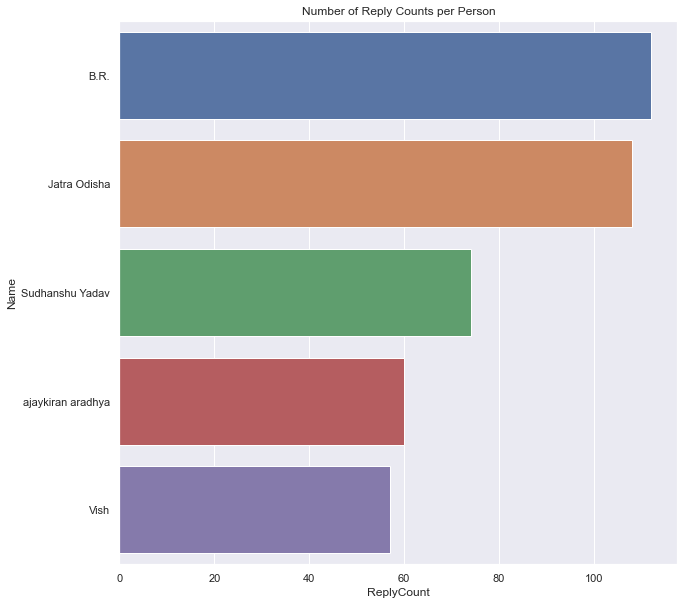

In [84]:
# --------------- Visualizations -------------------------------------
# 1) Sorting Top 5 People whose comments got maximum Reply_Counts!!:
top5_ReplyCount_users = NewData.sort_values(by='ReplyCount', ascending=False).head(5)
plt.title('Number of Reply Counts per Person')
sns.set(rc={'figure.figsize':(5,10)})
sns.barplot(y = 'Name', x = 'ReplyCount', data=top5_ReplyCount_users)
plt.show()

In [94]:
print(top5_ReplyCount_users[['Name']].head(1), 'got Maximum Reply Counts in their comment')

      Name
4422  B.R. got Maximum Reply Counts in their comment


**--------2) Top 5 People who got Maximum Likes on their comments-------------**

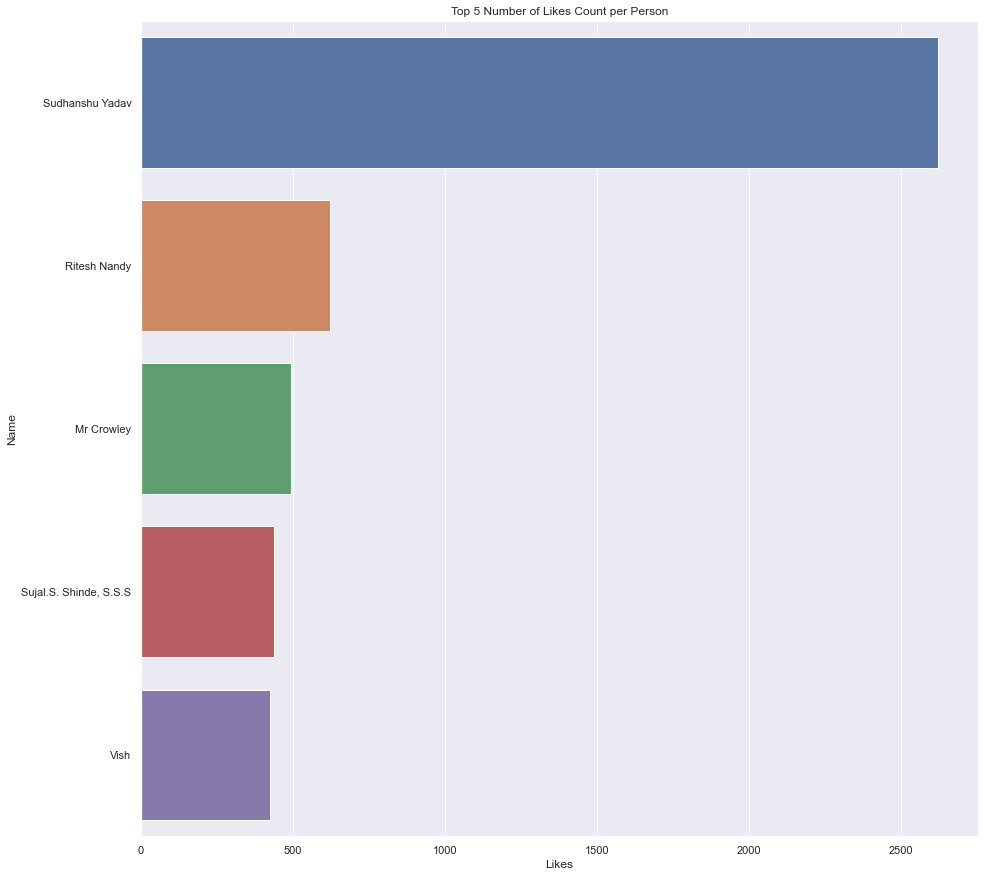

In [74]:
# Top 5 People who Liked the 
top5_Likes_users = NewData.sort_values(by='Likes', ascending=False).head(5)
plt.title('Top 5 Number of Likes Count per Person')
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(y='Name', x = 'Likes',data= top5_Likes_users)
plt.show()

In [93]:
print(top5_Likes_users[['Name']].head(1), 'got Maximum likes in their comment')

                 Name
3832  Sudhanshu Yadav got Maximum likes in their comment


**--------3) Comments per Year-------------**

In [63]:
Comments_per_year =  NewData.groupby('Year', as_index=False).size()
Comments_per_year

,Year,size
0,2020,3256
1,2021,1093
2,2022,359


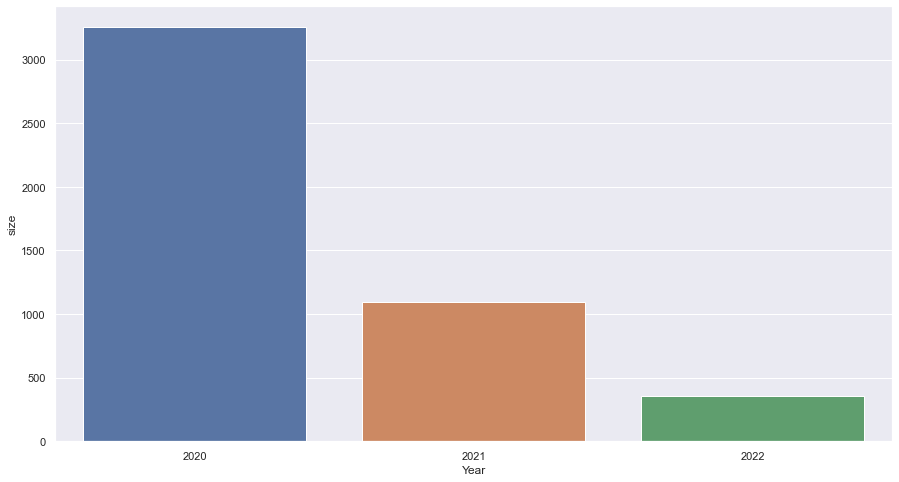

In [66]:
# YEAR Wise Comment Analysis
sns.set(rc = {'figure.figsize':(15,8)})
YEARwise_Comment_Insights = sns.barplot(x='Year', y='size', data = Comments_per_year)

**We can see Major number of commenting actions took place on 2020 when the year when video got uploaded!!** --------------------------------------------------------------------------------------------------------------------------------------------------

**-----------4) Comments per Month:----------------------**

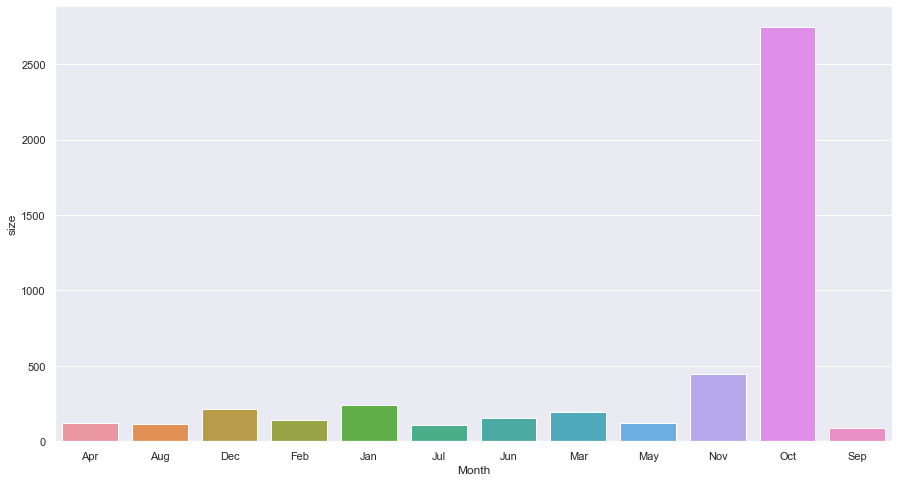

In [51]:
# 2) Comments per Month:
Comments_per_month = NewData.groupby('Month', as_index=False).size()
# Using Categorical Index
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Comments_per_month.index = pd.CategoricalIndex(Comments_per_month['Month'], categories=sort_order, ordered=True)
# MONTH wise Comment Analysis
sns.set(rc = {'figure.figsize':(15, 8)})
Monthwise_Comment_Insights = sns.barplot(x='Month', y='size', data = Comments_per_month )

Here we can observe that alot of people are interacting in October Month wrt Comments to the Video

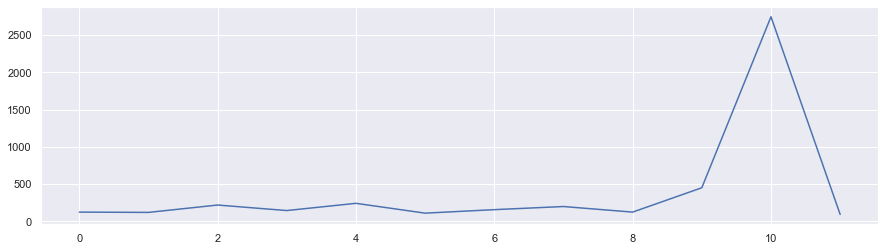

In [89]:
plt.figure(figsize=(15,4))
Comments_per_month['size'].plot()
plt.show()

**-------------5) Day Wise Comments Insights:---------------**

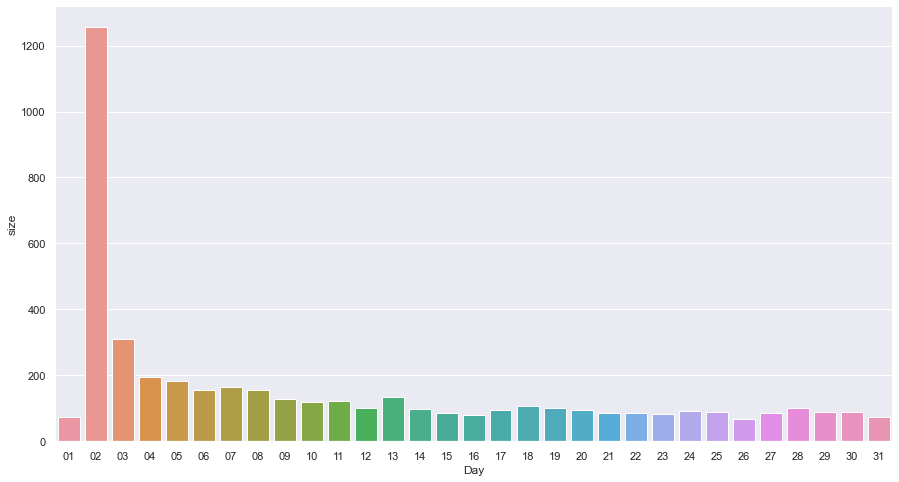

In [79]:
# Day Wise Comments Insights:
Comments_per_day = NewData.groupby('Day', as_index=False).size()
sns.set(rc = {'figure.figsize':(15,8)})
DAYwise_Comment_Insights = sns.barplot(x='Day', y='size', data = Comments_per_day)

 People are commented heavily On the Day 2 of each month of the entire Video Go Live till now,

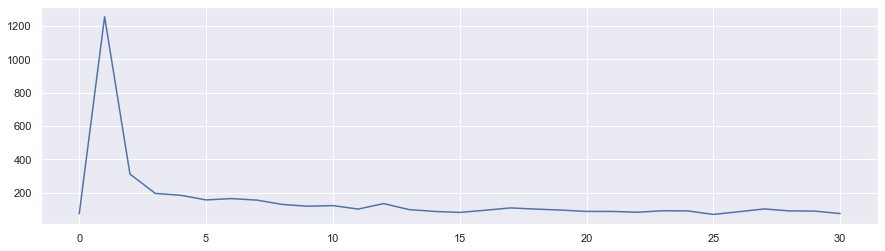

In [88]:
plt.figure(figsize=(15,4))
Comments_per_day['size'].plot()
plt.show()

**----------6)Session wise comments-----------------**

In [75]:
Comments_per_session =  NewData.groupby('session', as_index=False).size()
Comments_per_session

,session,size
0,Early Morning,1258
1,Eve,803
2,Late Night,440
3,Morning,1103
4,Night,115
5,Noon,989


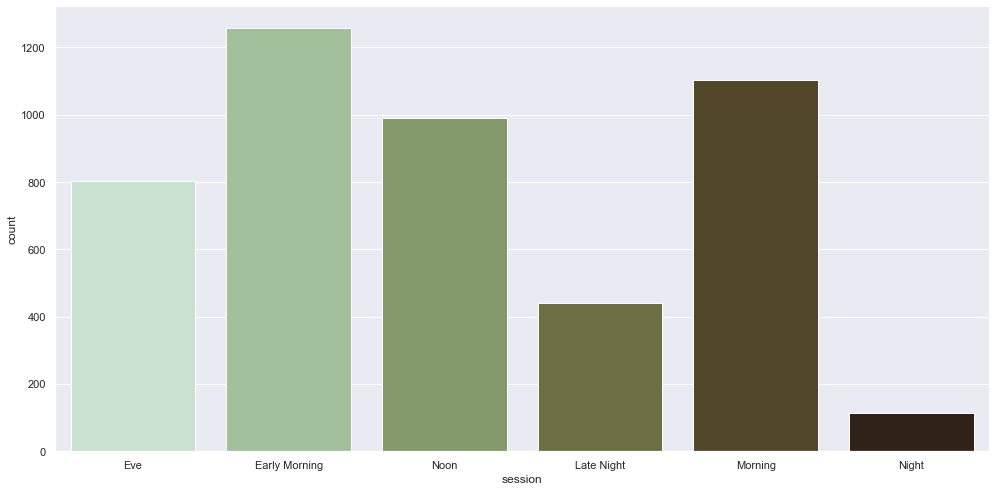

In [74]:
ax12 = sns.catplot(data = NewData, x = 'session', kind='count', palette='ch: 25',height=7, aspect=2.0)

**----------7) Interaction of Comments session wrt Month---------**

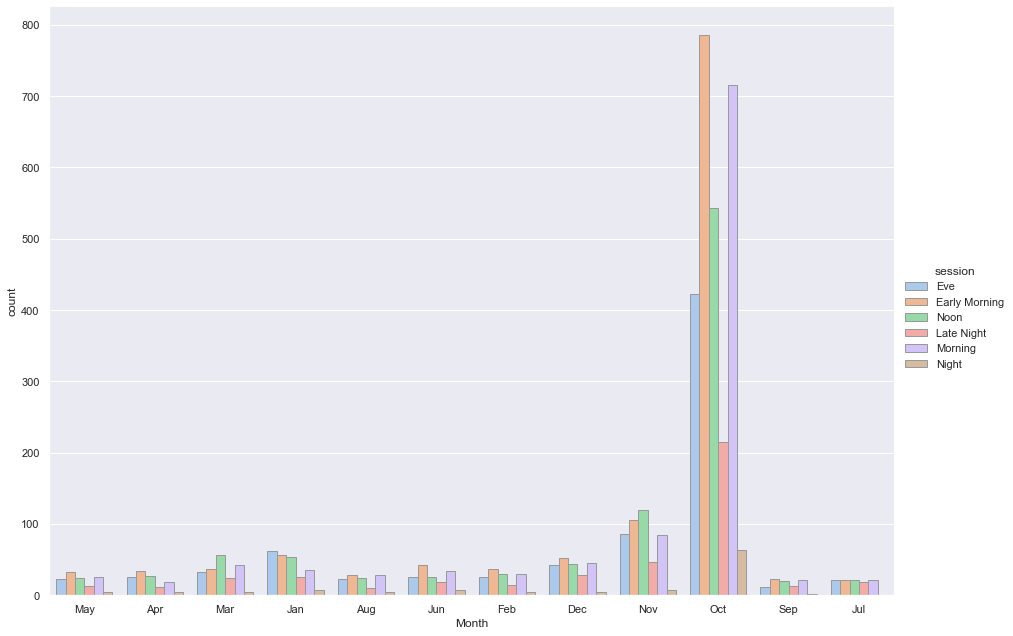

In [70]:
# 6) Cat Plot according to Session wrt Month
sns.catplot(
    data=NewData, x="Month", hue="session", kind="count",
    palette="pastel", edgecolor=".6", aspect=11.7/8.27, height=9)
plt.show()

**So, In October 'Early_Morning' and 'Morning' Lot of People Commented i.e Post 12PM to just verify that the Data Visuals are Correct**

**----------8) Likes Vs Year----------------**

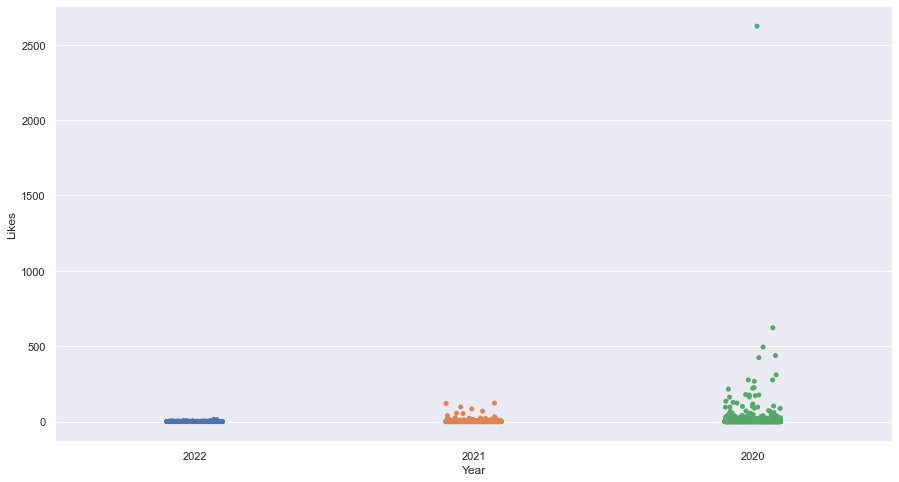

In [90]:
# 7)  Likes Vs Year
sns.stripplot(y='Likes',x='Year',data=NewData)
plt.show()

**------------9) Session wise Likes wrt percentage---------------**

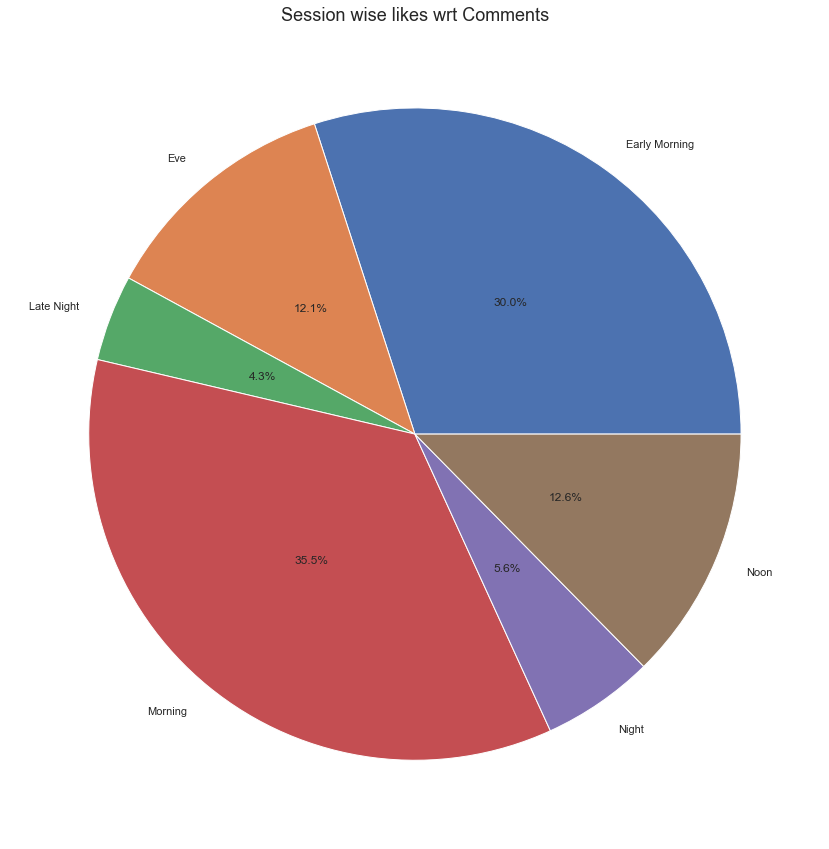

In [108]:
data = NewData.groupby("session")["Likes"].sum()
pie, ax = plt.subplots(figsize=[15,15])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("Session wise likes wrt Comments", fontsize=18) 
plt.show()

# Natural Language Processing

In [7]:
NewData

,Name,Comment,Time,Likes,ReplyCount,date,time,Month,Year,Day,hour,session
1,Tapas Roy,@mozzarella I,2022-05-09 18:33:49+00:00,0,NaN,2022-05-09,18:33:49,May,2022,09,18,Eve
2,Tapas Roy,@mozzarella u,2022-05-09 18:33:26+00:00,0,NaN,2022-05-09,18:33:26,May,2022,09,18,Eve
3,Tapas Roy,@Sudipto Chatterjee Uuummm ti,2022-05-09 18:33:16+00:00,0,NaN,2022-05-09,18:33:16,May,2022,09,18,Eve
4,Tapas Roy,@Sudipto Chatterjee you can,2022-05-09 18:32:47+00:00,0,NaN,2022-05-09,18:32:47,May,2022,09,18,Eve
5,Tapas Roy,@Sudipto Chatterjee Yuttyiuy y iity,2022-05-09 18:32:41+00:00,0,NaN,2022-05-09,18:32:41,May,2022,09,18,Eve
...,...,...,...,...,...,...,...,...,...,...,...,...
4704,RN J,Hi,2020-10-02 07:30:44+00:00,0,0.0,2020-10-02,07:30:44,Oct,2020,02,7,Early Morning
4705,Tanishq Chaudhary 1271,1st comment,2020-10-02 07:30:41+00:00,0,0.0,2020-10-02,07:30:41,Oct,2020,02,7,Early Morning
4706,AK,Love from EARTH Yaar and hats off for your eff...,2020-10-02 07:30:39+00:00,11,2.0,2020-10-02,07:30:39,Oct,2020,02,7,Early Morning
4707,# bpk,Love fron Jupiter buddy 😝😝,2020-10-02 09:44:56+00:00,2,NaN,2020-10-02,09:44:56,Oct,2020,02,9,Morning


In [8]:
# Importing spacy, nltk, nltk.corpus(stopwords), 
import spacy # language models
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import contractions
import inflect
from wordcloud import WordCloud
from nltk import word_tokenize


nlp = spacy.load("en_core_web_md")

In [9]:
# Cleaned the Comment applied various Cleaning functions and using NLTK and Spacy libraries. 
# Introduced new variable called ‘clean_text’
# Custom Imports
import cleaningComments

In [10]:
from cleaningComments import number_to_text, lemmatiz_text, cleantext

In [11]:
# Backing up the NewData!!
cleandata = NewData.copy()

In [15]:
# Applying the Module for Cleaning the comments column and introducing new clean_text comment variable in the dataframe!!
cleandata["clean_text"] = cleandata["Comment"].apply(cleantext)

In [16]:
#Final New Cleaned DataFrame
cleandata

,Name,Comment,Time,Likes,ReplyCount,date,time,Month,Year,Day,hour,session,clean_text
1,Tapas Roy,@mozzarella I,2022-05-09 18:33:49+00:00,0,NaN,2022-05-09,18:33:49,May,2022,09,18,Eve,mozzarella
2,Tapas Roy,@mozzarella u,2022-05-09 18:33:26+00:00,0,NaN,2022-05-09,18:33:26,May,2022,09,18,Eve,mozzarella
3,Tapas Roy,@Sudipto Chatterjee Uuummm ti,2022-05-09 18:33:16+00:00,0,NaN,2022-05-09,18:33:16,May,2022,09,18,Eve,sudipto chatterjee uuummm ti
4,Tapas Roy,@Sudipto Chatterjee you can,2022-05-09 18:32:47+00:00,0,NaN,2022-05-09,18:32:47,May,2022,09,18,Eve,sudipto chatterjee
5,Tapas Roy,@Sudipto Chatterjee Yuttyiuy y iity,2022-05-09 18:32:41+00:00,0,NaN,2022-05-09,18:32:41,May,2022,09,18,Eve,sudipto chatterjee yuttyiuy iity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,RN J,Hi,2020-10-02 07:30:44+00:00,0,0.0,2020-10-02,07:30:44,Oct,2020,02,7,Early Morning,hi
4705,Tanishq Chaudhary 1271,1st comment,2020-10-02 07:30:41+00:00,0,0.0,2020-10-02,07:30:41,Oct,2020,02,7,Early Morning,1st comment
4706,AK,Love from EARTH Yaar and hats off for your eff...,2020-10-02 07:30:39+00:00,11,2.0,2020-10-02,07:30:39,Oct,2020,02,7,Early Morning,love earth yaar hat efforts yaar
4707,# bpk,Love fron Jupiter buddy 😝😝,2020-10-02 09:44:56+00:00,2,NaN,2020-10-02,09:44:56,Oct,2020,02,9,Morning,love fron jupiter buddy


## NLP Visuals

**1) Based on the Highest Frequency Words List**

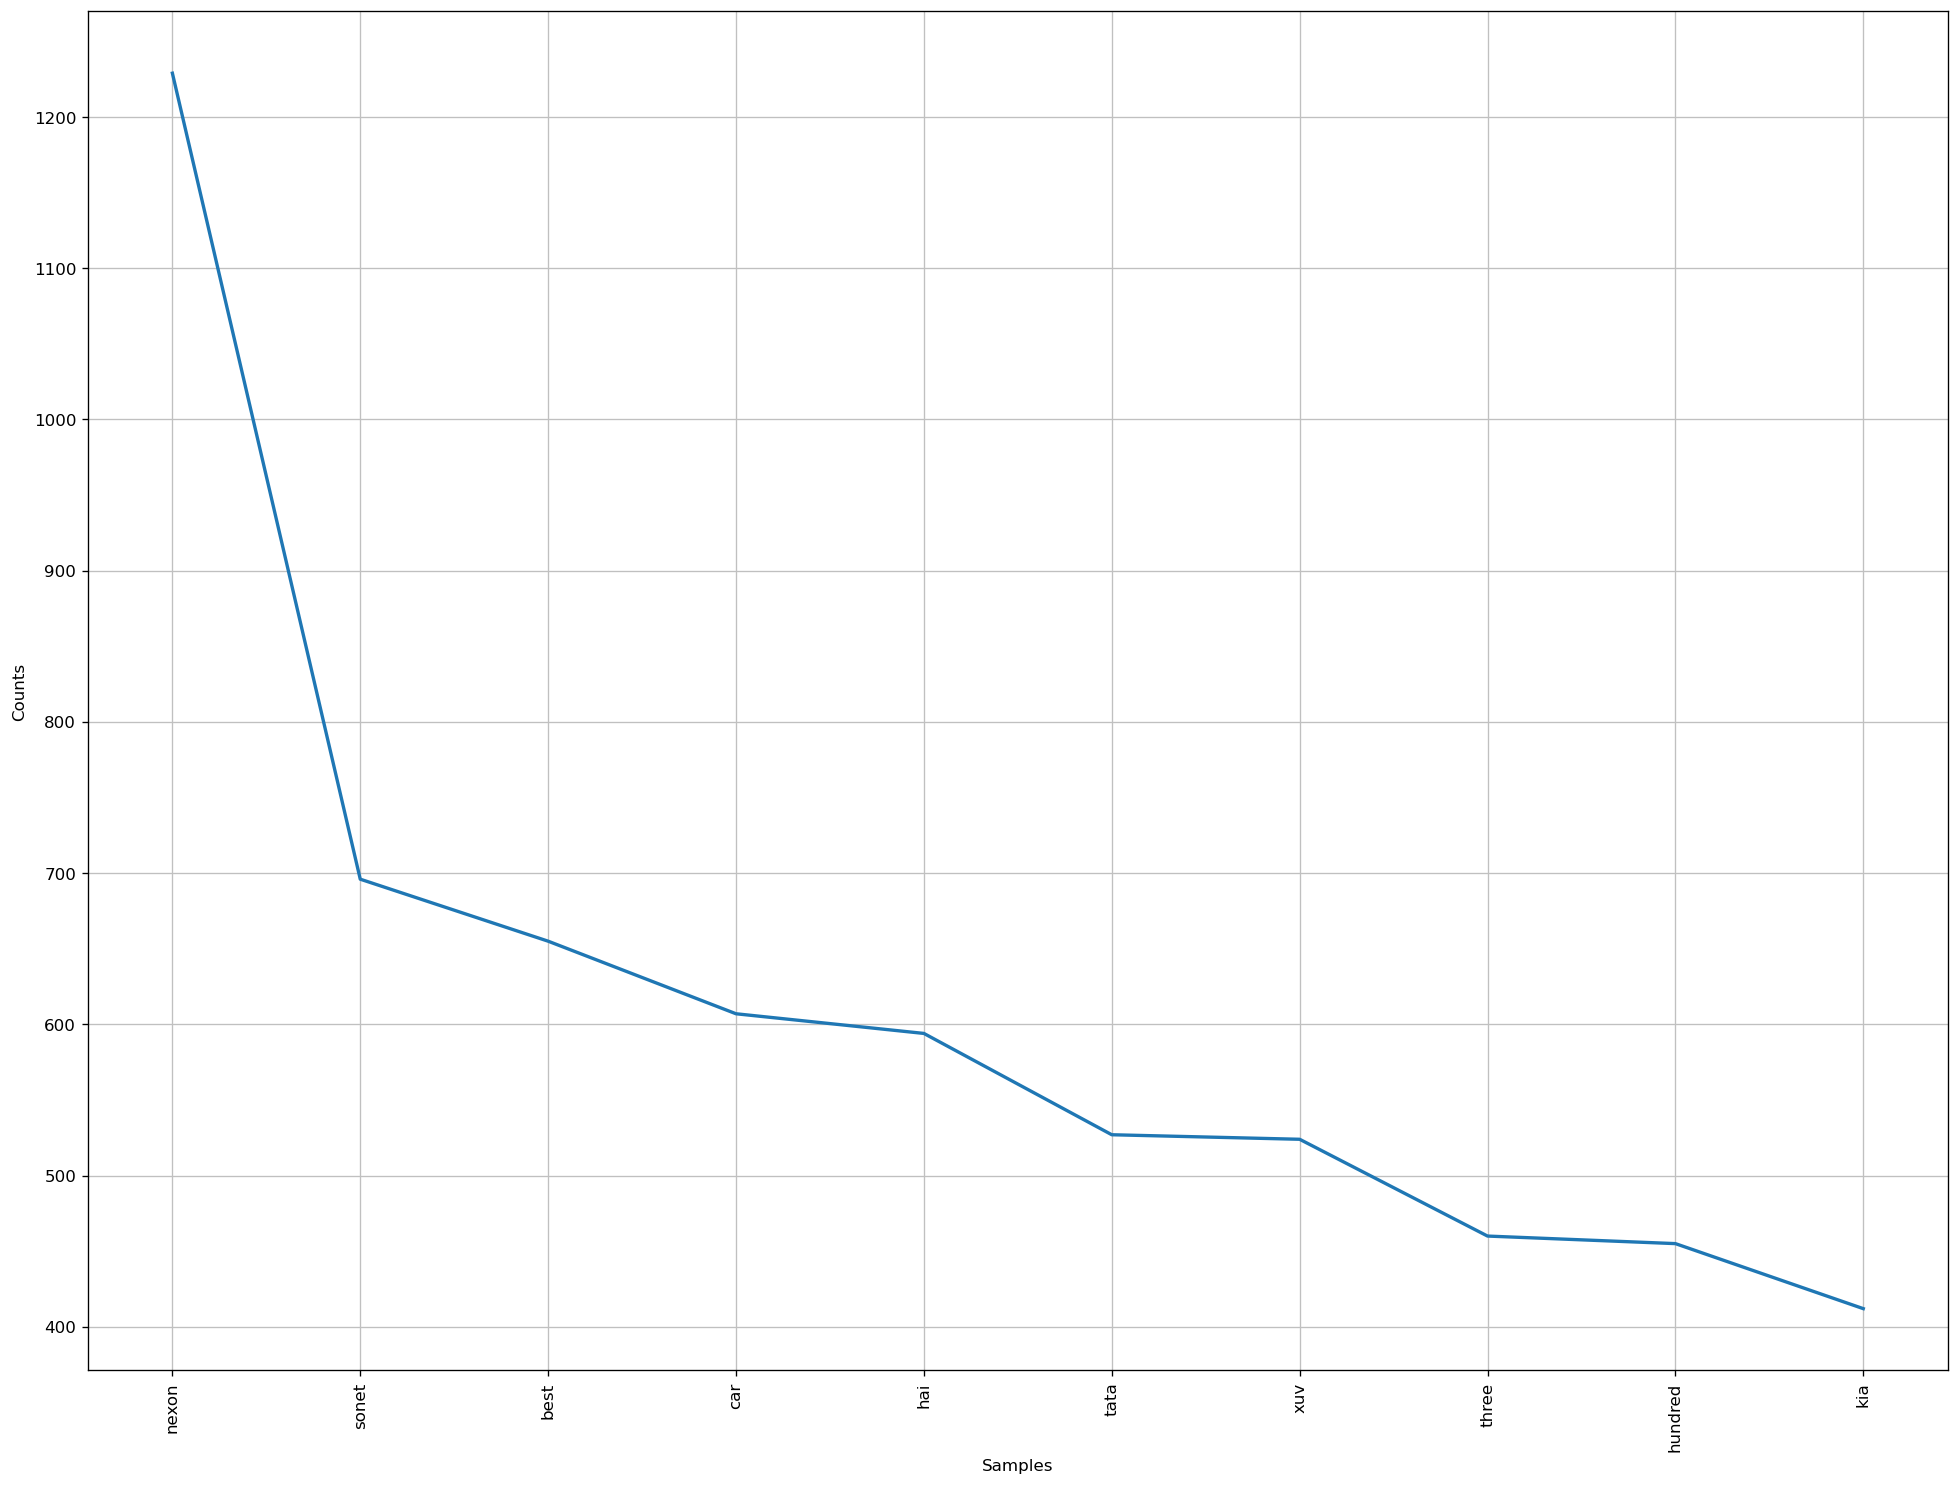

In [27]:
complete_review_string = " ".join ([rev for rev in cleandata["clean_text"]])
words = nltk.word_tokenize(complete_review_string)

# Based on the Highest Frequency Word Cloud
from nltk.probability import FreqDist
plt.figure(figsize=(20, 15), dpi=120)
fdist = FreqDist(words)
fdist.plot(10,cumulative=False)
plt.show()

As you can see nexon is the highly used word in the entire commens by people in the video

**2)  Wordcloud based on Frequencies irrespective of Positive words/Negative Words**

Word Cloud based Highest Frequencies irrespective of Positive words/Negative Words


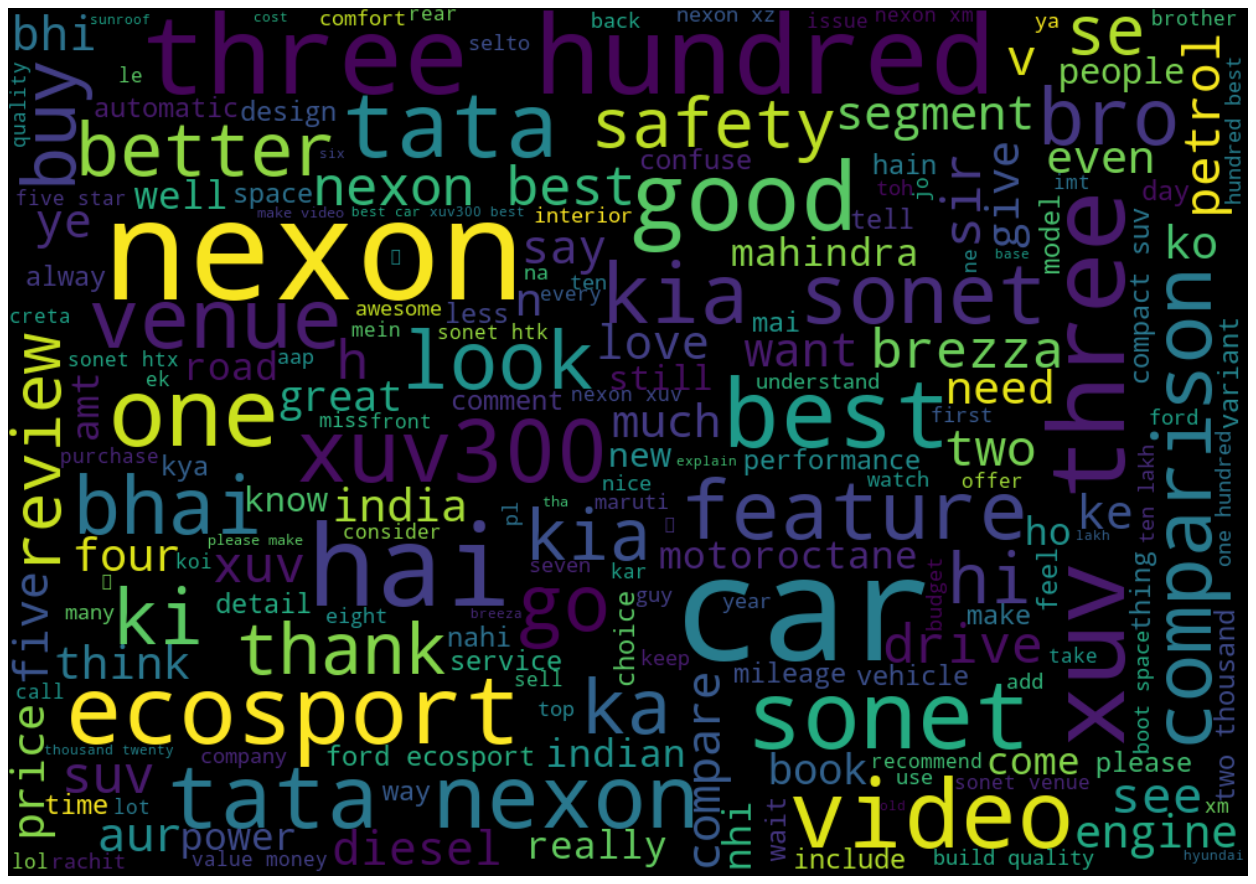

In [28]:
# Wordcloud based on Frequencies irrespective of Positive words/Negative Words
print('Word Cloud based Highest Frequencies irrespective of Positive words/Negative Words')
wordCloud = WordCloud(width = 1000, height = 700, random_state = 21, max_font_size = 119).generate(complete_review_string)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

**3) Importing POSITIVE word corpus and visualizing and Checking the Frequencies**

Based on the Positive Frequency Word Cloud Plot!


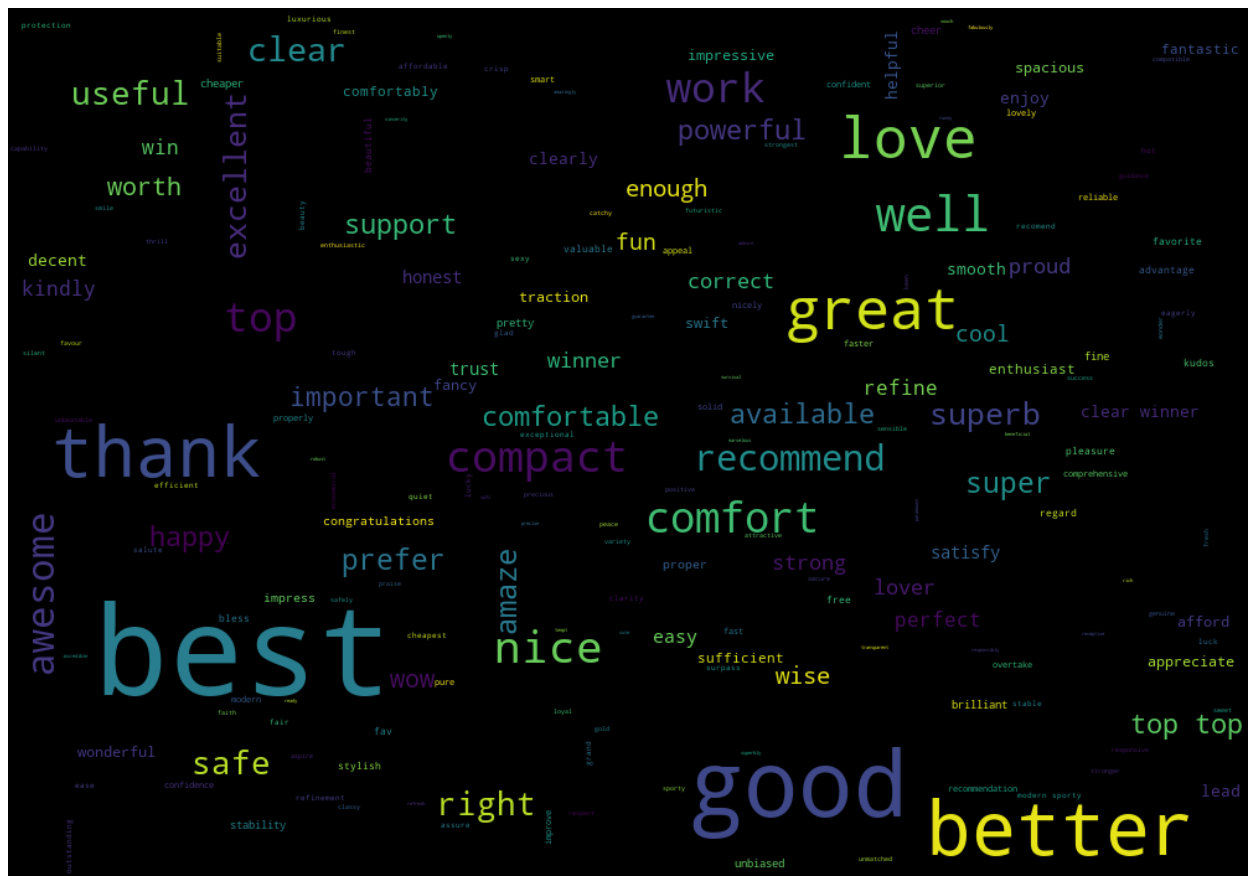

In [31]:
# 3) Importing POSITIVE word corpus and visualizing and Checking the Frequencies
with open("positive-words.txt","r",  encoding='utf-8') as pos:
    poswords = pos.read().split("\n")
review_pos = " ".join ([w for w in words if w in poswords])

# Positive Word Cloud
wordCloudPos = WordCloud(width = 1000, height = 700, random_state = 21, max_font_size = 100).generate(review_pos)
print('Based on the Positive Frequency Word Cloud Plot!')
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloudPos, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [43]:
# Analyzing the number of Positive Words in the Reviews
pos_words = nltk.word_tokenize(review_pos)
fdistPos = FreqDist(pos_words)

TotalPositiveWords = len(pos_words)
print('Top 10 Positive word tokens with their counts:', '\n')
print(TotalPositiveWords,'\n')

pos_words = nltk.word_tokenize(review_pos)
fdistPos = FreqDist(pos_words)
pd.DataFrame(fdistPos.most_common(10), columns=['Top Tokens','Frequencies'])

Top 10 Positive word tokens with their counts: 

3653 



,Top Tokens,Frequencies
0,best,655
1,good,312
2,like,280
3,better,197
4,thank,171
5,great,116
6,love,110
7,top,98
8,well,77
9,nice,66


**Frequence Distribution Bar Chart Visuals**

In [44]:
# Backing up the cleandata!!
cleandata1 = cleandata.copy()

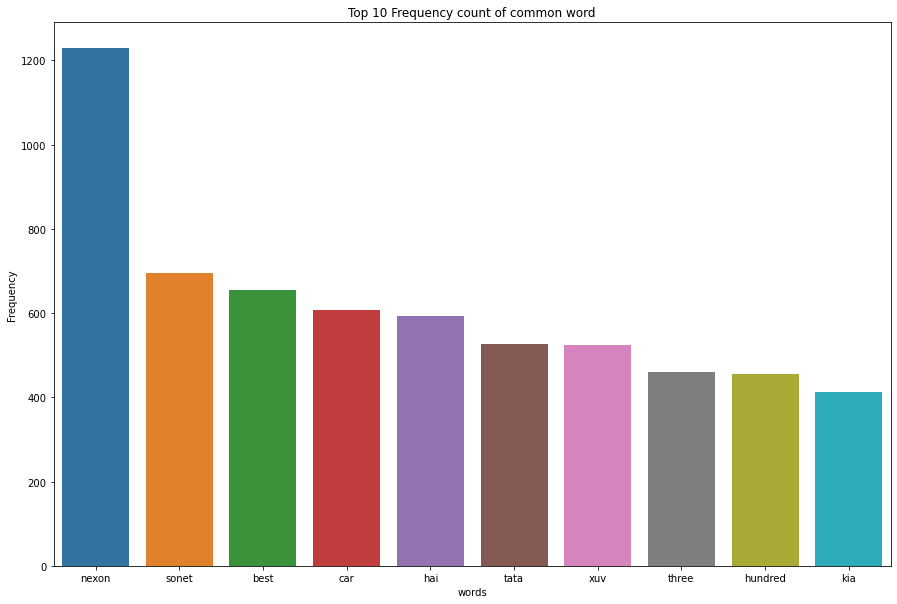

In [54]:
freq = pd.Series(' '.join(cleandata1['clean_text']).split()).value_counts()[:10]
freq = pd.DataFrame(data=freq)
freq.columns =['Frequency']
freq.reset_index(inplace = True)
freq.rename(columns = {'index':'words'},inplace = True)
plt.figure(figsize=(15,10))
sns.barplot(x='words',y='Frequency', data=freq)
plt.title('Top 10 Frequency count of common word')
plt.show()

**Sentiment Analysis using TextBLOB**

In [50]:
# Sentiment Analysis using TextBLOB (Introduced New Variable 'Sentiment_score')
from textblob import TextBlob

cleandata1['sentiment Score'] = cleandata['clean_text'].apply(lambda x: TextBlob(x).sentiment[0])
# New Variable 'Sentiment: having Positive, Neutral, Negative'
cleandata1['Sentiment'] = cleandata1['sentiment Score'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

# LabelEncoder for Endoding the Sentiment Categorical Column!! into (Negative,Neutral,Positive) as (0,1,2)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cleandata1['Sentiment'] = le.fit_transform(cleandata1['Sentiment'])
cleandata1

,Name,Comment,Time,Likes,ReplyCount,date,time,Month,Year,Day,hour,session,clean_text,sentiment Score,Sentiment
1,Tapas Roy,@mozzarella I,2022-05-09 18:33:49+00:00,0,NaN,2022-05-09,18:33:49,May,2022,09,18,Eve,mozzarella,0.0,1
2,Tapas Roy,@mozzarella u,2022-05-09 18:33:26+00:00,0,NaN,2022-05-09,18:33:26,May,2022,09,18,Eve,mozzarella,0.0,1
3,Tapas Roy,@Sudipto Chatterjee Uuummm ti,2022-05-09 18:33:16+00:00,0,NaN,2022-05-09,18:33:16,May,2022,09,18,Eve,sudipto chatterjee uuummm ti,0.0,1
4,Tapas Roy,@Sudipto Chatterjee you can,2022-05-09 18:32:47+00:00,0,NaN,2022-05-09,18:32:47,May,2022,09,18,Eve,sudipto chatterjee,0.0,1
5,Tapas Roy,@Sudipto Chatterjee Yuttyiuy y iity,2022-05-09 18:32:41+00:00,0,NaN,2022-05-09,18:32:41,May,2022,09,18,Eve,sudipto chatterjee yuttyiuy iity,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,RN J,Hi,2020-10-02 07:30:44+00:00,0,0.0,2020-10-02,07:30:44,Oct,2020,02,7,Early Morning,hi,0.0,1
4705,Tanishq Chaudhary 1271,1st comment,2020-10-02 07:30:41+00:00,0,0.0,2020-10-02,07:30:41,Oct,2020,02,7,Early Morning,1st comment,0.0,1
4706,AK,Love from EARTH Yaar and hats off for your eff...,2020-10-02 07:30:39+00:00,11,2.0,2020-10-02,07:30:39,Oct,2020,02,7,Early Morning,love earth yaar hat efforts yaar,0.5,2
4707,# bpk,Love fron Jupiter buddy 😝😝,2020-10-02 09:44:56+00:00,2,NaN,2020-10-02,09:44:56,Oct,2020,02,9,Morning,love fron jupiter buddy,0.5,2


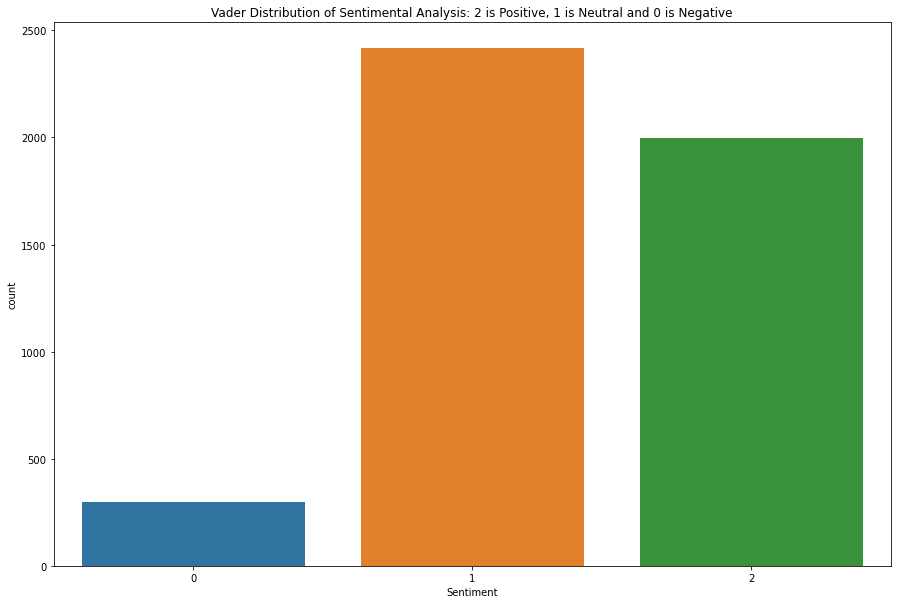

In [53]:
plt.figure(figsize=(15,10))
sns.countplot( x='Sentiment', y=None, data = cleandata1)
plt.title('Vader Distribution of Sentimental Analysis: 2 is Positive, 1 is Neutral and 0 is Negative')
plt.show()

In [110]:
# Importing NEGATIVE word corpus and visualizing and Checking the Frequencies
with open("negative-words.txt","r", encoding='utf-8') as pos:
   negwords = pos.read().split("\n")  
 
review_neg = " ".join ([w for w in words if w in negwords])

In [113]:
TotalNegativeTokens = len(pos_words)
print('Top 5 Negative word tokens with their counts:', '\n')
print(TotalNegativeTokens,'\n')

neg_words = nltk.word_tokenize(review_neg)
fdistNeg = FreqDist(neg_words)
pd.DataFrame(fdistNeg.most_common(5), columns=['Top Tokens','Frequencies'])

Top 5 Negative word tokens with their counts: 

3653 



,Top Tokens,Frequencies
0,confuse,65
1,miss,51
2,issue,45
3,grind,40
4,bad,33


Based on the Negative Frequency Word Cloud Plot!


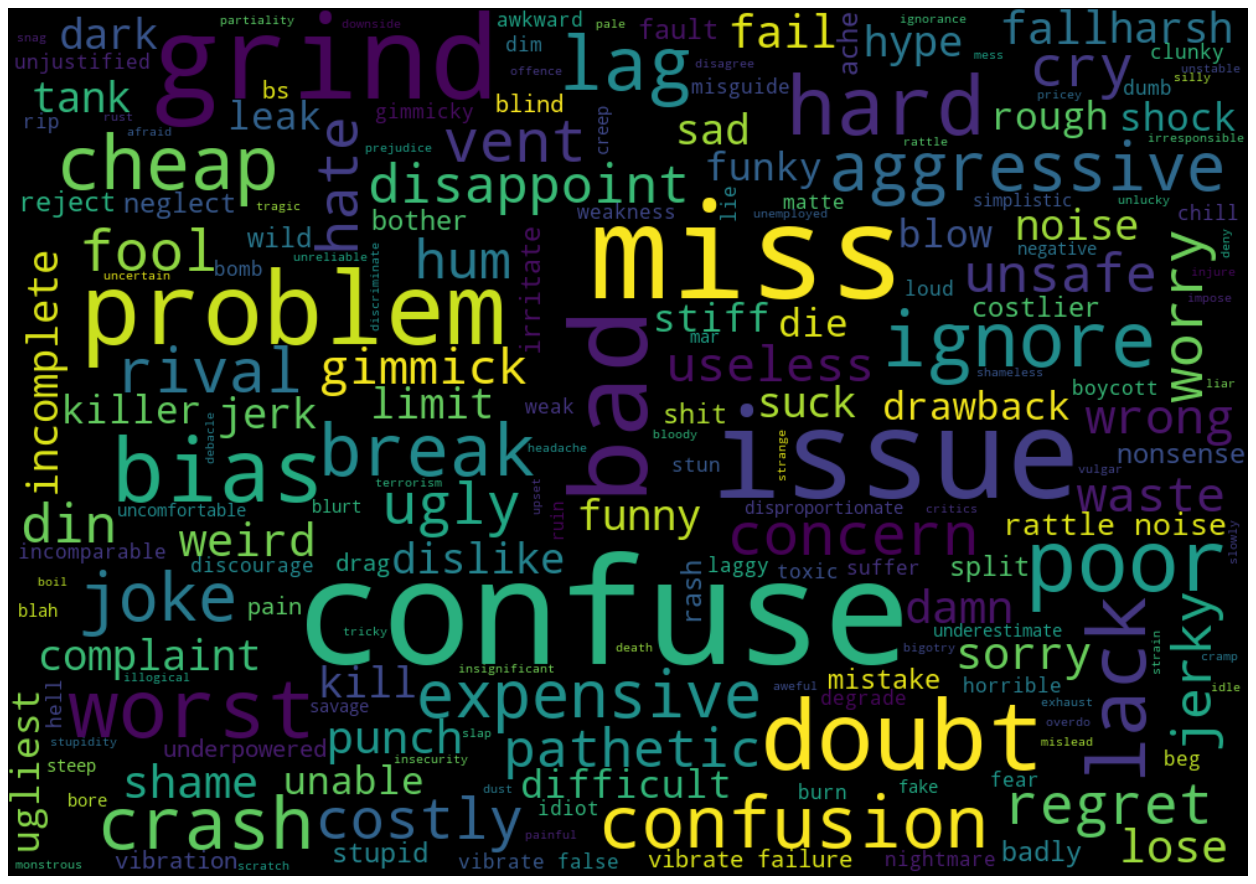

In [115]:
# NEGATIVE Word Cloud
wordCloudNeg = WordCloud(width = 1000, height = 700, random_state = 21, max_font_size = 119).generate(review_neg)
print('Based on the Negative Frequency Word Cloud Plot!')
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloudNeg, interpolation = "bilinear")
plt.axis("off")
plt.show()